In [3]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%pylab inline
import random

Populating the interactive namespace from numpy and matplotlib


In [36]:
# parameters
gamma = 0.5 # discounting rate
rewardSize = -1
gridSize = 4
alpha = 0.5 # (0,1] // stepSize
terminationStates = [[0,0], [gridSize-1, gridSize-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
numIterations = 10000

In [37]:
# initialization
V = np.zeros((gridSize, gridSize))
returns = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
deltas = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]

In [38]:
# utils
def generateInitialState():
    initState = random.choice(states[1:-1])
    return initState

def generateNextAction():
    return random.choice(actions)

def takeAction(state, action):
    if list(state) in terminationStates:
        return 0, None
    finalState = np.array(state)+np.array(action)
    # if robot crosses wall
    if -1 in list(finalState) or gridSize in list(finalState):
        finalState = state
    return rewardSize, list(finalState)

In [39]:
for it in tqdm(range(numIterations)):
    state = generateInitialState()
    while True:
        action = generateNextAction()
        reward, finalState = takeAction(state, action)
        # we reached the end
        if finalState is None:
            break
        # modify Value function
        before =  V[state[0], state[1]]
        V[state[0], state[1]] += alpha*(reward + gamma*V[finalState[0], finalState[1]] - V[state[0], state[1]])
        deltas[state[0], state[1]].append(float(np.abs(before-V[state[0], state[1]])))
        
        state = finalState

100%|██████████| 10000/10000 [00:01<00:00, 5956.11it/s]


### using gamma = 0.1 // alpha = 0.1 (convergence)

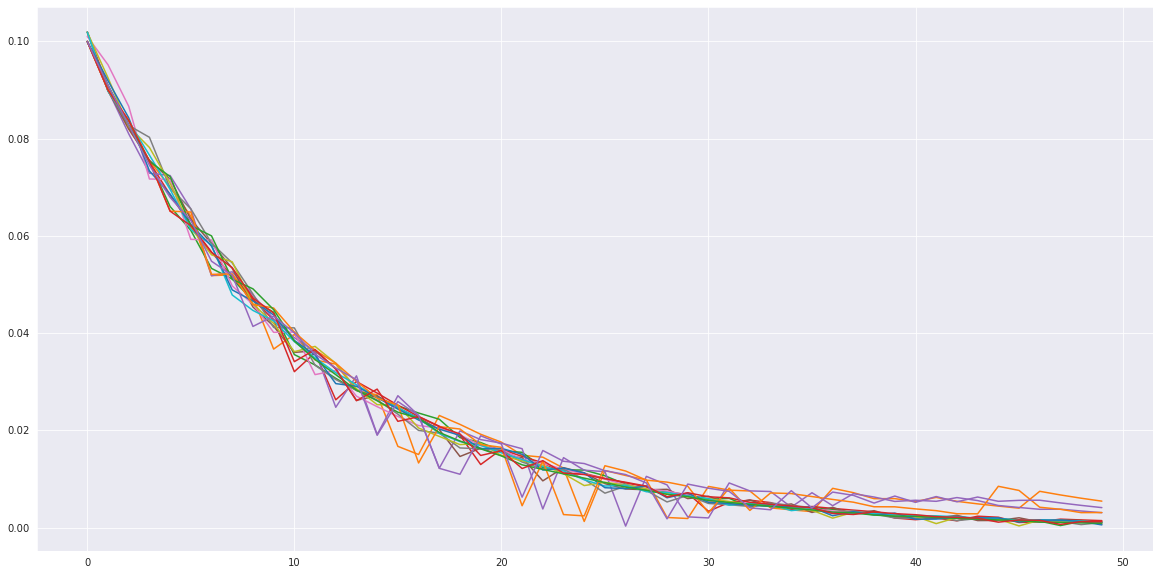

In [35]:
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)

### using gamma = 0.5 // alpha = 0.5 (no convergence)

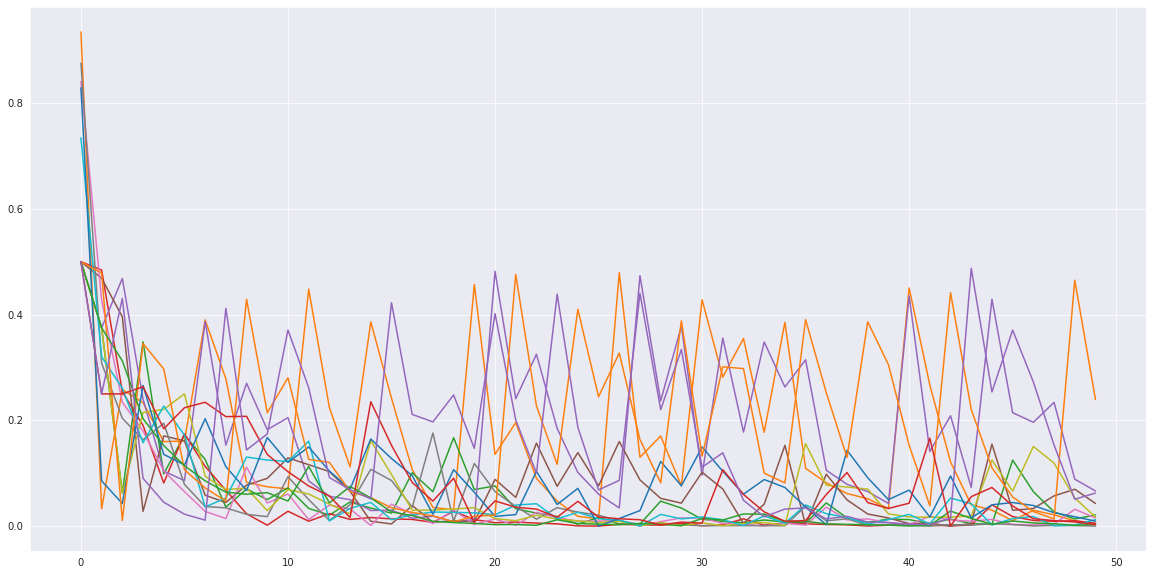

In [40]:
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)

In [41]:
V

array([[ 0.        , -1.77122292, -1.79963545, -1.96950131],
       [-1.39103921, -1.84008967, -1.98046693, -1.768363  ],
       [-1.90454154, -1.96631174, -1.93195548, -1.56383147],
       [-1.98742601, -1.98274088, -1.49220701,  0.        ]])

In [42]:
deltas

{(0, 0): [],
 (0, 1): [0.9345474776371816,
  0.0327262611814092,
  0.2581815652953523,
  0.23346777195507507,
  0.15981886622582797,
  0.16098453979141714,
  0.3898632410431315,
  0.2787743462949017,
  0.08284060316549158,
  0.0744611966121056,
  0.07047764626546194,
  0.4482085166905463,
  0.22410425834527303,
  0.11205212917263663,
  0.38621413829420637,
  0.2419306454895933,
  0.1071122441700032,
  0.03541170983273534,
  0.030842764903338482,
  0.45678181593125666,
  0.13580454601718595,
  0.1958131745683498,
  0.09033268125457683,
  0.047254323292390765,
  0.01850336473406,
  0.013877523550544835,
  0.4791837146741824,
  0.1302040713314545,
  0.17043590949605392,
  0.07620647141970194,
  0.4280150834606964,
  0.28178695307604595,
  0.35490101826837117,
  0.17745050913418559,
  0.3852366832736711,
  0.10932820189803572,
  0.08199615142352679,
  0.06170250738403915,
  0.05179189188914379,
  0.0331235137493493,
  0.4503147293759757,
  0.26676557425912906,
  0.1213760152935408,
  0.040